# Simrun- 6

In [3]:
import numpy as np
from datetime import date
np.random.seed(0)
import glob
from PARSER_MSD import ensemble_sqavg,getnparray ,getrunparams, time_msd 
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 

In [4]:
class ion:
    def __init__(self,i:int,pos:tuple):
        self.i=i        #assign an index to the ion
        self.pos=pos    #pos (y,x) of the ion in the space (which will be later mapped on the lattice)
        self.init=pos   #init position of ion in space 



class lat_2d:

    def __init__(self,N:int,coverage:float,epsilon:float):
        if coverage>1:
            print("Coverage Cannot be greater than 1")
            raise ValueError
        self.N=N
        self.epsilon=epsilon
        self.cov=coverage
        self.ions=list()        

    def get_lattice_2d(self):
        A=np.array([(i,j) for i in range(self.N) for j in range(self.N)])
        B=np.arange(0,self.N**2)
        ionc=list()                                                             #contains the intial position of all the occupying lattice ions
        choice=np.random.choice(B,int(self.cov*self.N*self.N),replace=False)
        lattice=np.zeros((self.N,self.N))
        for b in choice:
            lattice[ tuple(A[b]) ]=1 
            ionc.append(tuple(A[b]))    
        return (lattice, ionc)

    def get_energy_2d(self,sites):
        print(sites)
        A=np.array([(i,j) for i in range(self.N) for j in range(self.N)])
        B=np.arange(0,self.N**2)
        ionc=list()                                                             #contains the intial position of all the occupying lattice ions
        choice=np.random.choice(B,int(sites))#self.cov*self.N*self.N
        lattice=np.zeros((self.N,self.N))
        for b in choice:
            lattice[ tuple(A[b]) ]+=self.epsilon 
        
        return lattice

    def init_lattice(self):
        self.lattice,self.ionpos=self.get_lattice_2d()
        for i,posn in enumerate(self.ionpos):
            self.ions.append(ion(i,posn))
    
    def init_energylattice(self):
        
        self.enlattice=self.get_energy_2d(2*(100-self.cov*100)*(self.N**2)/100)
        
    def mappostolat(self,s,i:int):
        """
        Args:
        s(2-D numpy vector): the random next step (coordination number 4)
        Returns:
        i(int): index of the ion lattice ion
        2-tuple of indices for the mapped position of ion onto the lattice if that step is taken
        """
        if s is None:
            s=np.array((0,0))
        nextstep=np.array(self.ions[i].pos)+s
        return tuple(nextstep%self.N)
        

    def oneionstep(self,i):
        
        MOVES=[(1,0),(0,1),(-1,0),(0,-1)]
        s=np.array(MOVES[np.random.choice([0,1,2,3])]) # s is an array but class.pos is a tuple, so we add them by converting pos into ndarray and then revert it back to tuple
       # print("U: ",s, i)
        
        
        latposn=self.mappostolat(s,i)
        delU=self.enlattice[latposn]-self.enlattice[self.mappostolat(None,i)]
        """TODO Apply the energy lattice condition """
        rnd=np.random.uniform(0,1)
        prob=np.exp(-delU)
        if self.lattice[latposn]!=1 and prob>rnd: #if there is no ion in the step chosen
            self.lattice[self.mappostolat(None,i)]=0 #vacate teh current position in the lattice   
            self.ions[i].pos=tuple(np.array(self.ions[i].pos)+s) #update the ion position
            self.lattice[latposn]=1 #update the new filled position
        return None

    def onemcstep(self):
        if len(self.ions)!=0:
            [self.oneionstep(i) for i in range(len(self.ions))]
        else:
            self.init_lattice()
            self.onemcstep()
      
    def sqdisp(self):
        disp=np.zeros_like(self.ions)
        for i,io in enumerate(self.ions):
            disp[i]=np.linalg.norm((np.array(io.pos)-np.array(io.init)))**2
            #print("posn: ",(np.array(io.pos)-np.array(io.init)),":",np.linalg.norm((np.array(io.pos)-np.array(io.init))))
        return disp



In [13]:

write=0
N=20
NSTEPS=15000
WT=100
today=date.today()
epsilon=2223/1300
equilibriation=5000
Ns=NSTEPS-equilibriation



In [14]:
MSDS_=dict()
paramlen=7
steps=np.arange(0*100,(Ns//4),wp) 
for i,dire in enumerate(sorted(glob.glob('simdata\\Simrun-6'))):
    names=glob.glob(f'{dire}\\*.txt')#COVERAGE-*-NSTEPS*-*
    for fname in names:
        print(fname)
        params=getrunparams(fname,paramlen)
        narray=getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(time_msd(narray,fname,paramlen))

simdata\Simrun-6\Coverage-10-NSTEPS15000-October-13-2022.txt
25
_______________________
10 
 simdata\Simrun-6\Coverage-10-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-16-NSTEPS15000-October-13-2022.txt
25
_______________________
16 
 simdata\Simrun-6\Coverage-16-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-17-NSTEPS15000-October-13-2022.txt
25
_______________________
17 
 simdata\Simrun-6\Coverage-17-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-18-NSTEPS15000-October-13-2022.txt
25
_______________________
18 
 simdata\Simrun-6\Coverage-18-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-19-NSTEPS15000-October-13-2022.txt
25
_______________________
19 
 simdata\Simrun-6\Coverage-19-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-20-NSTEPS15000-October-13-2022.txt
25
_______________________
20 
 simdata\Simrun-6\Coverage-20-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-21-NSTEPS15000-October-13-2022.txt
25
____________

In [16]:
today=date.today()
coverage=[]
#coverage=[ 17 + 2*i for i in range( 8 )]
for cov in coverage:
    day=today.strftime("%B-%d-%Y")
    fname=f"simdata\\Simrun-6\Coverage-{cov}-NSTEPS{NSTEPS}-{day}.txt"
    with open(fname,'w+') as fhand: 
        mylat=lat_2d(N,cov/100,epsilon)
        mylat.init_lattice()
        mylat.init_energylattice()
        NIONS=len(mylat.ions)
        fhand.write(f"Created:{day} \n")
        fhand.write(f"Coverage:{cov} \n")
        fhand.write(f"N:{N} \n")
        fhand.write(f"NUM-IONS:{NIONS} \n")
        fhand.write(f"NSTEPS:{NSTEPS} \n")
        fhand.write(f"WRITE-PERIODICITY:{WT} \n")
        fhand.write(f"epsilon:{epsilon} \n")
        for i,step in enumerate(range(NSTEPS)):
            mylat.onemcstep()
            if i%WT==0 and i>equilibriation:
                for io in mylat.ions:
                    fhand.write(f"{io.pos[0]}  {io.pos[1]} \n")

664.0


KeyboardInterrupt: 

In [17]:
coverage

[17, 19, 21, 23, 25, 27, 29, 31]

KeyError: 19

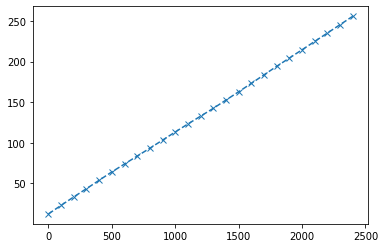

In [19]:

for cov in coverage:
    value=MSDS_[cov]
    plt.plot(steps,value,label=f'Coverage:{cov}'.split()[0],linestyle='--',marker='x')
    
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.show()

In [18]:
MSDS_=dict()
paramlen=7
steps=np.arange(0*100,(Ns//4),wp) 
for i,dire in enumerate(sorted(glob.glob('simdata\\Simrun-6'))):
    names=glob.glob(f'{dire}\\*.txt')#COVERAGE-*-NSTEPS*-*
    #print(i,'\n',names)
    for fname in names:
        print(fname)
        params=getrunparams(fname,paramlen)
        narray=getnparray(fname,params,paramlen)
        MSDS_[int(float(params['Coverage'].split()[0]))]=np.array(time_msd(narray,fname,paramlen))


simdata\Simrun-6\Coverage-10-NSTEPS15000-October-13-2022.txt
25
_______________________
10 
 simdata\Simrun-6\Coverage-10-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-16-NSTEPS15000-October-13-2022.txt
25
_______________________
16 
 simdata\Simrun-6\Coverage-16-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-17-NSTEPS15000-October-13-2022.txt
25
_______________________
17 
 simdata\Simrun-6\Coverage-17-NSTEPS15000-October-13-2022.txt
simdata\Simrun-6\Coverage-17-NSTEPS15000-October-14-2022.txt
25


C:\YSZ-Monte-Carlo\himanshusingh\PARSER_MSD.py:29: UserWarning: loadtxt: input contained no data: "simdata\Simrun-6\Coverage-17-NSTEPS15000-October-14-2022.txt"
  ndarray=np.loadtxt(fname,skiprows=paramlen)


AxisError: axis 1 is out of bounds for array of dimension 1

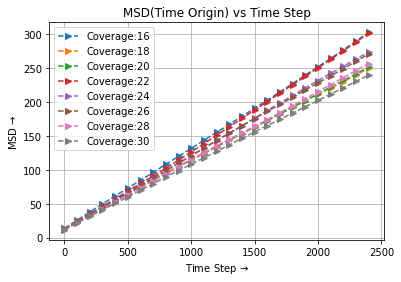

In [36]:
for cov in coverage:
    value=MSDS_[cov]
    plt.plot(steps,value,label=f'Coverage:{cov}'.split()[0],linestyle='--',marker='>')
    
plt.xlabel(r'Time Step $\to$')
plt.title('MSD(Time Origin) vs Time Step')
plt.ylabel(r'MSD $\to$')
plt.legend()
plt.grid()
plt.savefig(f'diffusivitypeak.jpg',bbox_inches='tight',dpi=300)

plt.show()